 ### Importing Libraries

In [1]:
import pandas as pd # pandas will be help full while handling missing values.
import numpy as np # numpy will help with the mathematical operations in dataset.
import matplotlib.pyplot as plt # for data visulization.
import seaborn as sns # for more colorful and iteractive visulization we use seaborn.
import warnings # to ignore the warning message.
from sklearn.preprocessing import LabelEncoder # Label encoder will be used to encode the catogorical values to numerical.
warnings.filterwarnings("ignore") # filter warinings will ignore the warnings messages.
sns.set() #seaborn is now set and its ready to use.

### Load the Dataset

In [2]:
data = pd.read_csv("Medical_insurance.csv") # Using pandas read_csv, medical_insurance.csv dataset has been imported.

### Exploratory Data Analysis

In [3]:
data.head() # head() will return the first 5 records.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail() # tail() will return the last 5 records.

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [5]:
data.sample(5) # Sample function will return a random of 5 numbers from the dataset.

,age,sex,bmi,children,smoker,region,charges
2720,18,female,31.92,0,no,northeast,2205.98080
98,56,male,19.95,0,yes,northeast,22412.64850
702,53,male,41.47,0,no,southeast,9504.31030
207,35,male,27.74,2,yes,northeast,20984.09360
2592,59,female,34.80,2,no,southwest,36910.60803


In [6]:
data.dtypes # dtypes will describe about the datatype present in dataset.

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.shape # shape function will return the number of rows and columns.

(2772, 7)

In [8]:
data.describe() # Finding statistics of the dataset.

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# 63770.42 --> 75%, but we got 16,577 which is means here we have outlier.

In [10]:
data.info() # Basic information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [11]:
data.drop_duplicates() # Dropping the duplicates by using drop_duplicates().

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
data.dropna() # by using dropna() function we can delete the null values.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


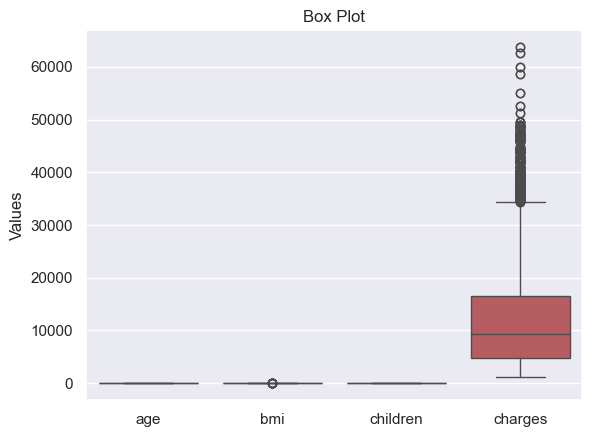

In [13]:
sns.boxplot(data=data) # syntax for blox plot using seaborn.
plt.title("Box Plot") # title for the data visulaization.
plt.ylabel("Values") # placing the values in y axis.
plt.show() # show() will show the plot.

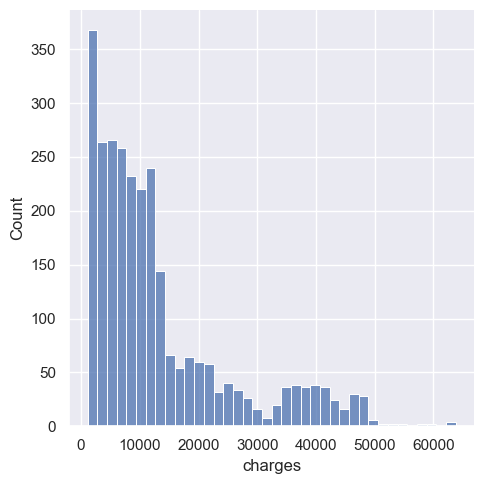

In [14]:
sns.displot(data['charges'])

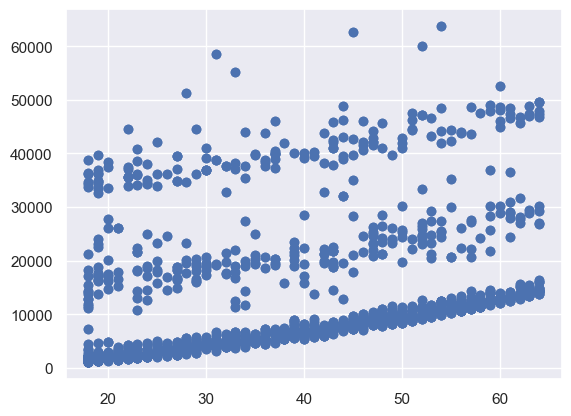

In [15]:
plt.scatter(data['age'],data['charges'])
plt.show()

In [16]:
remove_outlier_charges = data['charges'].quantile(0.99) # Finding last 0.01 quantile.
data = data[data['charges'] < remove_outlier_charges] # Removing the last 0.01 outlier so that our outlier is removed.

remove_outlier_bmi = data['bmi'].quantile(0.99)# Finding last 0.01 quantile
data = data[data['bmi'] < remove_outlier_bmi]# Removing the last 0.01 outlier so that our outlier is removed.

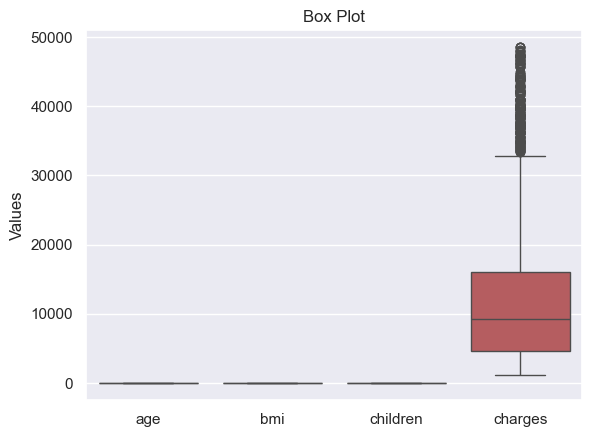

In [17]:
sns.boxplot(data=data) # syntax for blox plot using seaborn.
plt.title("Box Plot") # title for the data visulaization.
plt.ylabel("Values") # placing the values in y axis.
plt.show() # show() will show the plot.

In [18]:
log_charges = np.log(data['charges']) # converting the actual values to log values to remove the outlier values.

data['log_charges'] = log_charges # creating a new column called log_charges.

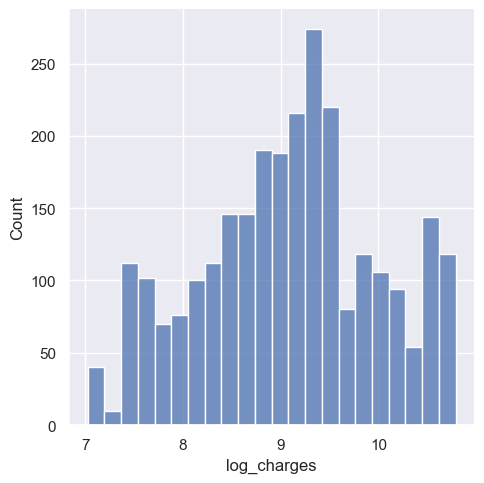

In [19]:
sns.displot(data['log_charges'])

In [20]:
data.describe() # Finding statistics of the dataset.

,age,bmi,children,charges,log_charges
count,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000
mean,39.000000,30.447327,1.100147,12856.573901,9.077406
std,14.056398,5.862119,1.215729,11474.580728,0.909856
min,18.000000,15.960000,0.000000,1121.873900,7.022756
25%,26.000000,26.125000,0.000000,4673.392200,8.449640
50%,39.000000,30.210000,1.000000,9257.146100,9.133151
75%,51.000000,34.400000,2.000000,16085.127500,9.685650
max,64.000000,46.200000,5.000000,48549.178350,10.790333


In [21]:
data = data.drop(['charges'],axis=1) # As now we have log_charges, now we can drop the charges column.

In [22]:
data.head() # head() will return the first 5 records.

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


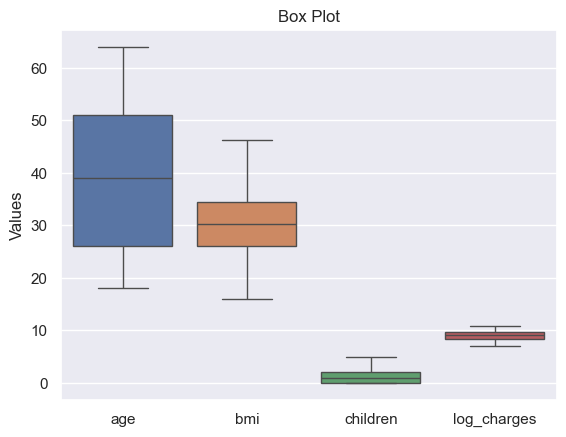

In [23]:
sns.boxplot(data=data) # syntax for blox plot using seaborn.
plt.title("Box Plot") # title for the data visulaization.
plt.ylabel("Values") # placing the values in y axis.
plt.show() # show() will show the plot.

In [24]:
# Label Encoding
label_encoders = {} # Initialize an empty dictionary to store LabelEncoder objects for each column
for column in data.select_dtypes(include=['object']).columns: #Loop through all columns in the DataFrame that have an 'object'.
    le = LabelEncoder() # Create a LabelEncoder instance
    # Fit the LabelEncoder on the current column's unique values and transform the data
    # Replace the original categorical values with numerical codes in the DataFrame 👇
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le # Store the LabelEncoder object in the dictionary for future reference

In [25]:
data.head() # head() will return the first 5 records.

,age,sex,bmi,children,smoker,region,log_charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197


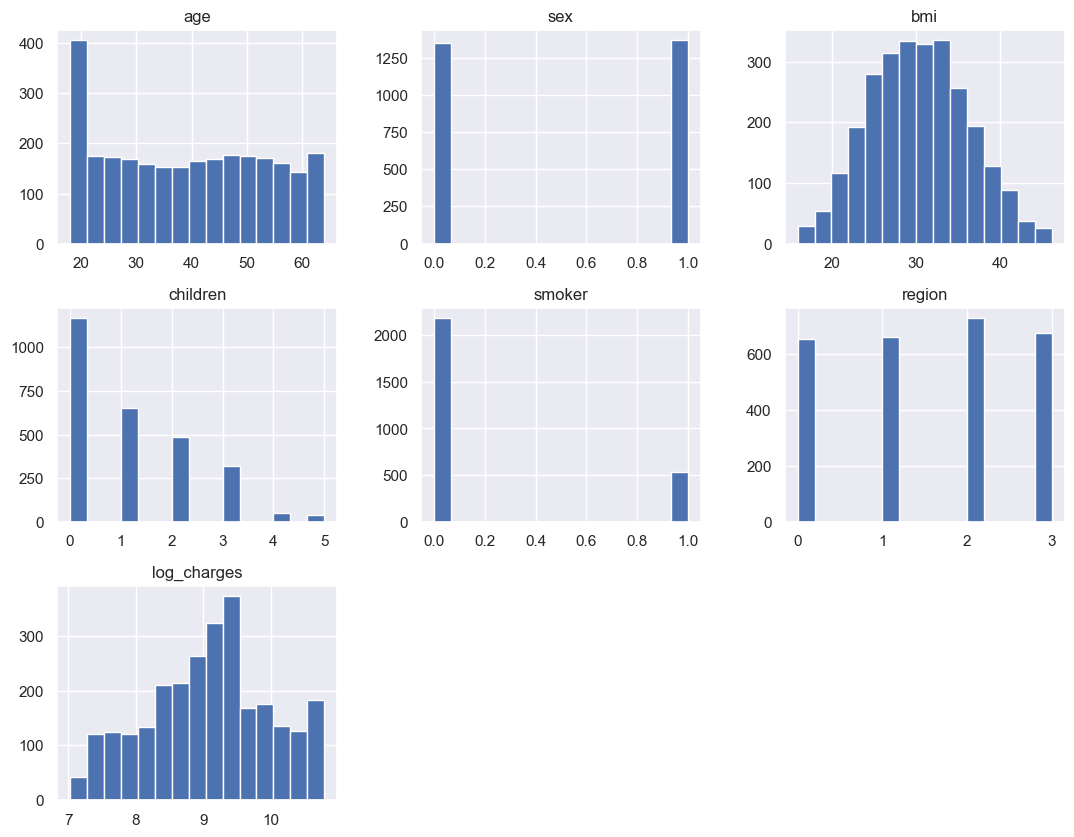

In [26]:
data.hist(bins=15, figsize=(13, 10)) # Histogram for getting the basic information about the dataset.

plt.show() # show() will show the plot.

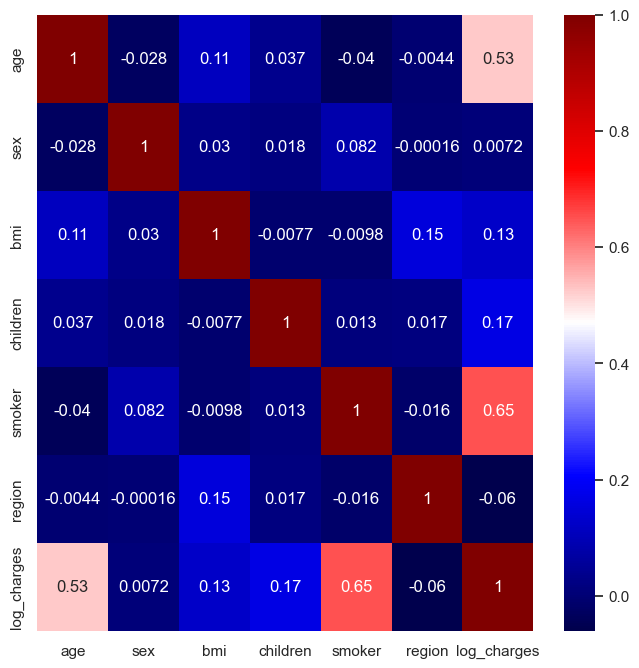

In [27]:
corrmat = data.corr() # finding the correlection for my dataset by using .corr() function.

top_corr_features = corrmat.index # This gets the list of column names in the dataset.

plt.figure(figsize=(8, 8)) # Defining the figure size.

g = sns.heatmap(data[top_corr_features].corr(), # Generating the Heatmap from seaborn and finding correlation for all the columns.
                annot=True, # annot is the number values in the graph.
                cmap='seismic') # cmap is the color feature.